In [1]:
from keras import Sequential
from keras.losses import MeanSquaredError
from keras.metrics import Accuracy
from keras.optimizers import Adam
from numpy import float32, reshape
from datasets import generate_line_dataset, generate_square_wave_dataset
from FourierLayer import FourierLayer
import matplotlib.pyplot as plt


2025-09-11 21:18:55.441966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, Y = generate_square_wave_dataset(-10, 10, 256)
X = reshape(X, (256, 1, 1)).astype(float32)

model = Sequential([
    FourierLayer(100),
])

model.compile(
    loss=MeanSquaredError(),
    optimizer=Adam(learning_rate=1e-2),
)

hisotry = model.fit(X, Y, 50, 1000, shuffle=True, verbose=0)

In [3]:
history['val']

8/8 [==============================] - 0s 9ms/step


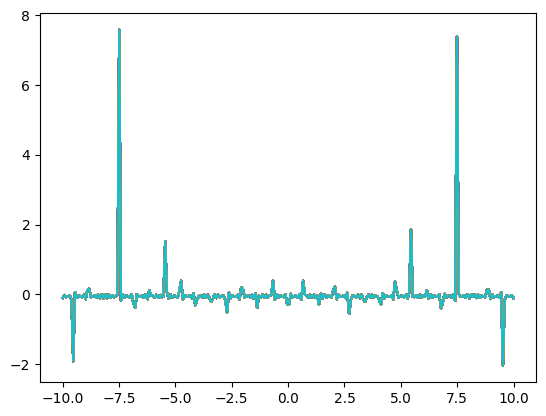

In [4]:
Y_pred = model.predict(X)
Xs = reshape(X, (256,))
# plt.plot(Xs, Y)
plt.plot(Xs, Y_pred)